  
## Gerrymandering 

*Inspired by Allison Obourn's submission to Nifty Assignments at SIGCSE 2019.*   
   
  
***DATA:*** 
MIT Election Data And Science Lab. (2017). U.S. House 1976–2020 [Data set]. Harvard Dataverse. https://doi.org/10.7910/DVN/IG0UN2

### Overview  

[Gerrymandering](https://en.wikipedia.org/wiki/Gerrymandering) is the manipulation of voting district boundaries so that they provide a significant advantage to one party. You can read about the history of gerrymandering and its impact on democracy [here](https://www.brennancenter.org/our-work/research-reports/gerrymandering-explained). There are many approaches to demonstrating that an electoral map is gerrymandered, in this project I will implement the [efficiency gap](https://www.brennancenter.org/sites/default/files/legal-work/How_the_Efficiency_Gap_Standard_Works.pdf) approach when examining results from congressional elections.

Used pandas to read `1978_house.csv` and stored the entire data set as a DataFrame.

In [19]:
import pandas as pd
df = pd.read_csv('1978_house.csv')
df

,year,state,district,candidate,party,candidatevotes,totalvotes
0,1978,ALABAMA,1,JACK EDWARDS,REPUBLICAN,71711,112161
1,1978,ALABAMA,1,L W NOONAN,DEMOCRAT,40450,112161
2,1978,ALABAMA,2,WENDELL MITCHELL,DEMOCRAT,49341,107265
3,1978,ALABAMA,2,"WILLIAM L ""BILL"" DICKINSON",REPUBLICAN,57924,107265
4,1978,ALABAMA,3,BILL NICHOLS,DEMOCRAT,74895,74897
...,...,...,...,...,...,...,...
1125,1978,WISCONSIN,9,F JAMES SENSENBRENNER,REPUBLICAN,118386,193688
1126,1978,WISCONSIN,9,MATTHEW J FLYNN,DEMOCRAT,75207,193688
1127,1978,WISCONSIN,9,WRITEIN,NaN,95,193688
1128,1978,WYOMING,0,RICHARD BRUCE CHENEY,REPUBLICAN,75855,129377


`Efficiency Gap = (Total Democratic Wasted Votes – Total Republican Wasted Votes) ÷ Total Votes`


This function takes as input a DataFrame and the name of a state and returns the efficiency gap for the state. The DataFrame is in the same format as the one previously created

In [20]:
def ef_gap(data, state):
    import pandas as pd
    df = pd.read_csv(data)
    data_file = df.query('state == @state')
    gop = data_file.query('party == "REPUBLICAN"')
    gop_total = sum(gop['candidatevotes'])
    dem = data_file.query('party == "DEMOCRAT"')
    dem_total = sum(dem['candidatevotes'])
    gop_waste = 0
    dem_waste = 0
    total_votes = sum(set(data_file['totalvotes']))
    if gop_total > dem_total:
        gop_waste = (float(gop_total)) - ((float(total_votes/2))+1)
        dem_waste = dem_total
    else:
        gop_waste = gop_total
        dem_waste = (float(dem_total)) - ((float(total_votes/2))+1)
    ef = (float((dem_waste - gop_waste) / total_votes))*100
    return ef

This cell uses the previous function to create a list of tuples ('state name', efficiency gap) 
for all fifty states based on 1978 data.

In [21]:
state_ef_gaps = [('ALABAMA',ef_gap('1978_house.csv','ALABAMA')),('ALASKA',ef_gap('1978_house.csv','ALASKA')),
                 ('ARIZONA',ef_gap('1978_house.csv','ARIZONA')),('ARKANSAS',ef_gap('1978_house.csv','ARKANSAS')),
                 ('CALIFORNIA',ef_gap('1978_house.csv','CALIFORNIA')),('COLORADO',ef_gap('1978_house.csv','COLORADO')),
                 ('CONNECTICUT',ef_gap('1978_house.csv','CONNECTICUT')),('DELAWARE',ef_gap('1978_house.csv','DELAWARE')),
                 ('GEORGIA',ef_gap('1978_house.csv','GEORGIA')),('HAWAII',ef_gap('1978_house.csv','HAWAII')),
                 ('IDAHO',ef_gap('1978_house.csv','IDAHO')),('ILLINOIS',ef_gap('1978_house.csv','ILLINOIS')),
                 ('INDIANA',ef_gap('1978_house.csv','INDIANA')),('IOWA',ef_gap('1978_house.csv','IOWA')),
                 ('KANSAS',ef_gap('1978_house.csv','KANSAS')),('KENTUCKY',ef_gap('1978_house.csv','KENTUCKY')),
                 ('LOUISIANA',ef_gap('1978_house.csv','LOUISIANA')),('MAINE',ef_gap('1978_house.csv','MAINE')),
                 ('MARYLAND',ef_gap('1978_house.csv','MARYLAND')),('MASSACHUSETTS',ef_gap('1978_house.csv','MASSACHUSETTS')),
                 ('MICHIGAN',ef_gap('1978_house.csv','MICHIGAN')),('MINNESOTA',ef_gap('1978_house.csv','MINNESOTA')),
                 ('MISSISSIPPI',ef_gap('1978_house.csv','MISSISSIPPI')),('MISSOURI',ef_gap('1978_house.csv','MISSOURI')),
                 ('MONTANA',ef_gap('1978_house.csv','MONTANA')),('NEBRASKA',ef_gap('1978_house.csv','NEBRASKA')),
                 ('NEVADA',ef_gap('1978_house.csv','NEVADA')),('NEW HAMPSHIRE',ef_gap('1978_house.csv','NEW HAMPSHIRE')),
                 ('NEW JERSEY',ef_gap('1978_house.csv','NEW JERSEY')),('NEW MEXICO',ef_gap('1978_house.csv','NEW MEXICO')),
                 ('NEW YORK',ef_gap('1978_house.csv','NEW YORK')),('NORTH CAROLINA',ef_gap('1978_house.csv','NORTH CAROLINA')),
                 ('NORTH DAKOTA',ef_gap('1978_house.csv','NORTH DAKOTA')),('OHIO',ef_gap('1978_house.csv','OHIO')),
                 ('OKLAHOMA',ef_gap('1978_house.csv','OKLAHOMA')),('OREGON',ef_gap('1978_house.csv','OREGON')),
                 ('PENNSYLVANIA',ef_gap('1978_house.csv','PENNSYLVANIA')),('RHODE ISLAND',ef_gap('1978_house.csv','RHODE ISLAND')),
                 ('SOUTH CAROLINA',ef_gap('1978_house.csv','SOUTH CAROLINA')),('SOUTH DAKOTA',ef_gap('1978_house.csv','SOUTH DAKOTA')),
                 ('TENNESSEE',ef_gap('1978_house.csv','TENNESSEE')),('TEXAS',ef_gap('1978_house.csv','TEXAS')),
                 ('UTAH',ef_gap('1978_house.csv','UTAH')),('VERMONT',ef_gap('1978_house.csv','VERMONT')),
                 ('VIRGINIA',ef_gap('1978_house.csv','VIRGINIA')),('WASHINGTON',ef_gap('1978_house.csv','WASHINGTON')),
                 ('WEST VIRGINIA',ef_gap('1978_house.csv','WEST VIRGINIA')),('WISCONSIN',ef_gap('1978_house.csv','WISCONSIN')),
                 ('WYOMING',ef_gap('1978_house.csv','WYOMING'))]
state_ef_gaps

[('ALABAMA', -12.261415989001664),
 ('ALASKA', 39.02139515408215),
 ('ARIZONA', -44.02811658207799),
 ('ARKANSAS', 16.75987178612835),
 ('CALIFORNIA', -46.48466717675704),
 ('COLORADO', 45.84417238064315),
 ('CONNECTICUT', -33.45567818879338),
 ('DELAWARE', 32.975388091339504),
 ('GEORGIA', 10.467486926472237),
 ('HAWAII', 14.197277488564112),
 ('IDAHO', 32.73363642418231),
 ('ILLINOIS', 46.32561600875283),
 ('INDIANA', -45.07020332495205),
 ('IOWA', 49.64484426507286),
 ('KANSAS', 19.289581915554635),
 ('KENTUCKY', -38.01389013971822),
 ('LOUISIANA', -49.7967929962338),
 ('MAINE', 31.681740194088583),
 ('MARYLAND', -18.456274883475803),
 ('MASSACHUSETTS', -7.02677249952194),
 ('MICHIGAN', -35.654836515230194),
 ('MINNESOTA', -45.41046339230958),
 ('MISSISSIPPI', -47.05507735648729),
 ('MISSOURI', -24.70777777849656),
 ('MONTANA', -48.71680400910519),
 ('NEBRASKA', 24.30932861162317),
 ('NEVADA', -1.8563456798220443),
 ('NEW HAMPSHIRE', 45.57828396227876),
 ('NEW JERSEY', -39.349989632

Now let's look at a larger data set. This data set has information from every House election from 1976 to 2020. I first used pandas to load the csv file into a DataFrame. Then removed the necessary columns so that the data is in the same format as the 1978 data used previously. 

In [22]:
import pandas as pd
df = pd.read_csv('1976-2020-house.csv')
df = df.drop(columns=['state_po', 'state_fips','state_cen','state_ic','office','stage','runoff','special','writein',
                'mode','unofficial','version','fusion_ticket'])
df

,year,state,district,candidate,party,candidatevotes,totalvotes
0,1976,ALABAMA,1,BILL DAVENPORT,DEMOCRAT,58906,157170
1,1976,ALABAMA,1,JACK EDWARDS,REPUBLICAN,98257,157170
2,1976,ALABAMA,1,WRITEIN,NaN,7,157170
3,1976,ALABAMA,2,J CAROLE KEAHEY,DEMOCRAT,66288,156362
4,1976,ALABAMA,2,"WILLIAM L ""BILL"" DICKINSON",REPUBLICAN,90069,156362
...,...,...,...,...,...,...,...
31098,2020,WYOMING,0,LYNNETTE GREY BULL,DEMOCRAT,66576,278503
31099,2020,WYOMING,0,OVERVOTES,NaN,1274,278503
31100,2020,WYOMING,0,RICHARD BRUBAKER,LIBERTARIAN,10154,278503
31101,2020,WYOMING,0,UNDERVOTES,NaN,6337,278503


Using matplotllib, this function takes in a DataFrame and a state name and plots the efficiency gap of that state (vertical axis) against the year (horizontal axis) for 1976-2020. I have plotted the data for Alabama, California, and Colorado.

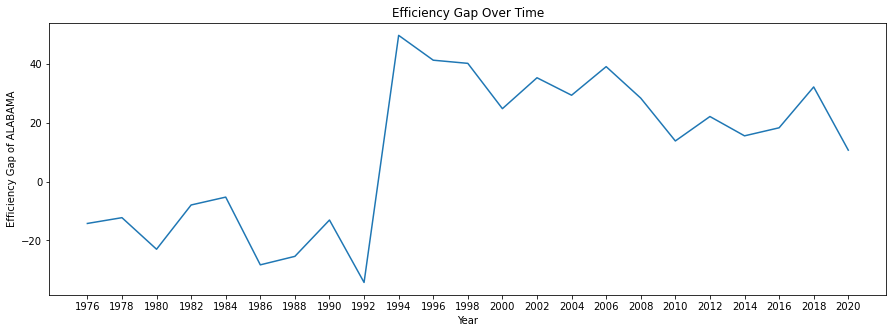

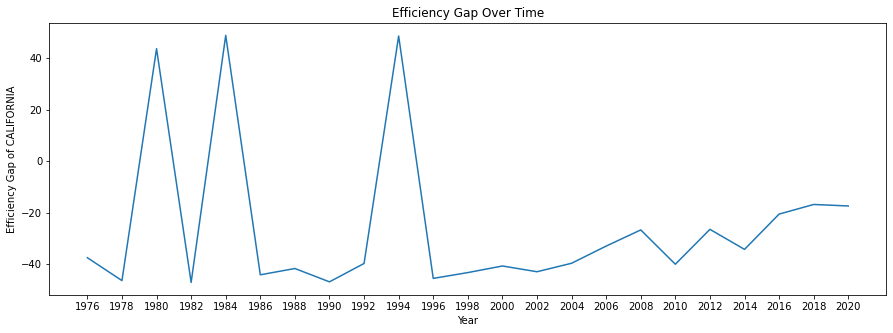

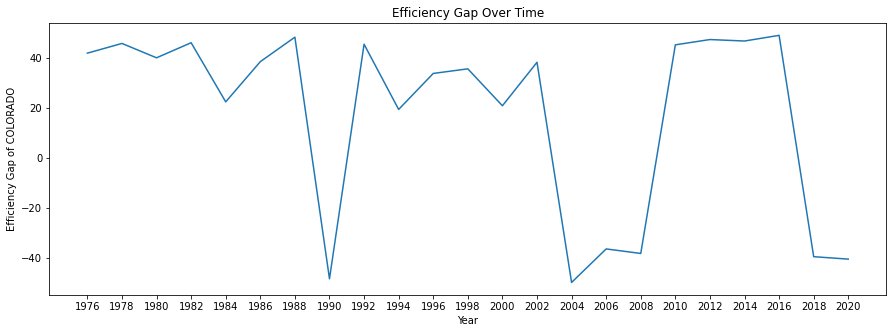

In [23]:
def ef_plots(data,state):
    import pandas as pd
    import numpy as np
    import matplotlib
    import matplotlib.pyplot as plt
    df = pd.read_csv(data)
    df = df.drop(columns=['state_po', 'state_fips','state_cen','state_ic','office','stage','runoff','special','writein',
                'mode','unofficial','version','fusion_ticket'])
        
    y = np.arange(1976,2021,2)
    ef_array = []
    
    for year in y:
        df = pd.read_csv(data)
        data_file = df.query('state==@state & year == @year')
        gop = data_file.query('party == "REPUBLICAN"')
        gop_total = sum(gop['candidatevotes'])
        dem = data_file.query('party == "DEMOCRAT"')
        dem_total = sum(dem['candidatevotes'])
        gop_waste = 0
        dem_waste = 0
        total_votes = sum(set(data_file['totalvotes']))
        if gop_total > dem_total:
            gop_waste = (float(gop_total)) - ((float(total_votes/2))+1)
            dem_waste = dem_total
        else:
            gop_waste = gop_total
            dem_waste = (float(dem_total)) - ((float(total_votes/2))+1)
        ef = (float((dem_waste - gop_waste) / total_votes))*100
        ef_array.append(ef)
    d = np.array(ef_array)
    
    fig = plt.figure(figsize = (15, 5))
    plt.plot(y, d,)
    plt.xlabel('Year')
    plt.ylabel(f'Efficiency Gap of {state}')
    plt.title('Efficiency Gap Over Time')
    plt.xticks(y)
    plt.show()
ef_plots('1976-2020-house.csv', 'ALABAMA')
ef_plots('1976-2020-house.csv', 'CALIFORNIA')
ef_plots('1976-2020-house.csv', 'COLORADO')